## Task

Використовуючи датасет з файлу cardox.csv (об’єми продажів мережі супермаркетів) виконайте наступну роботу:
- Проведіть попередній аналіз даних
- Скорегуйте виявлені аномалії
- Проведіть необхідні попередні підготовки даних (декомпозиція, коригування ряду, заповнення пропущених значень і. т. і.)
- Оберіть модель і проведіть оцінку її метрик
- Проведіть кінцеву діагностику для отриманої моделі
- Виконайте прогноз на 30 років
- Збережіть результати прогнозування у файл


In [88]:
import pandas as pd
import numpy as np
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("cardox.csv")
df.head()


,date,value
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    729 non-null    object 
 1   value   729 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB
None


In [56]:
df.index = pd.to_datetime(df['date'])

In [57]:
del df['date']

In [58]:
df.head()

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [45]:
df.tail()

,value
date,
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51
2018-10-01,406.00
2018-11-01,408.02


[<Axes: >]

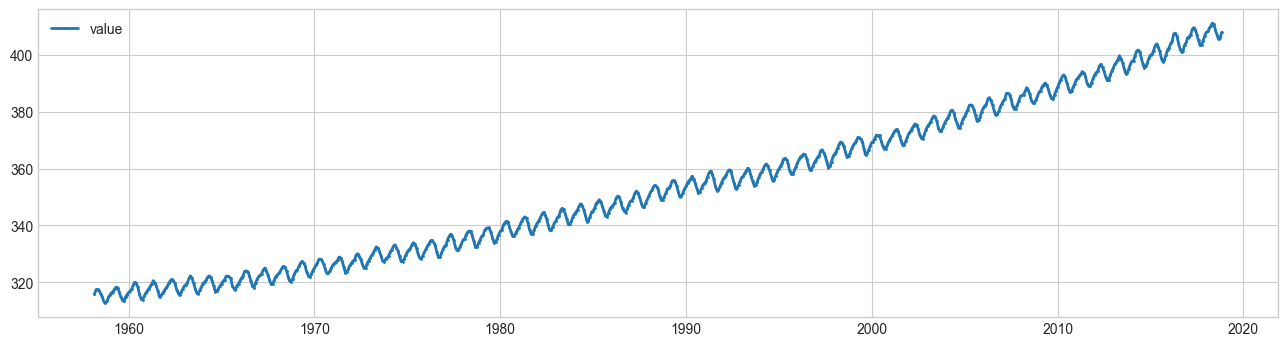

In [62]:
plot(df, ts_linewidth=2)

In [9]:
df.describe()

,value
count,729.000000
mean,353.787229
std,27.547500
min,312.660000
25%,328.570000
50%,351.410000
75%,375.990000
max,411.240000


In [10]:
from adtk.data import validate_series
s = validate_series(df)

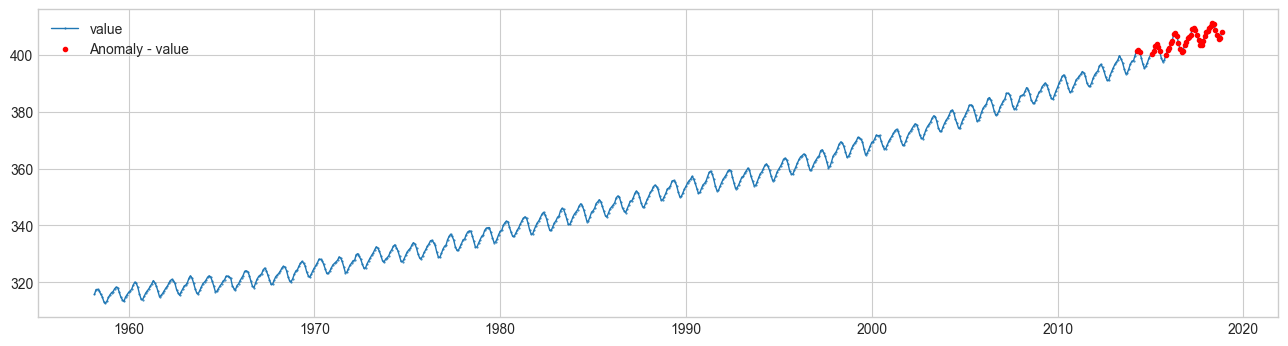

In [11]:
threshold_ad = ThresholdAD(high=400, low=300)
anomalies = threshold_ad.detect(s)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=1, anomaly_markersize=3, anomaly_color='red', anomaly_tag="marker");

In [12]:
anomalies

,value
date,
1958-03-01,False
1958-04-01,False
1958-05-01,False
1958-06-01,False
1958-07-01,False
...,...
2018-07-01,True
2018-08-01,True
2018-09-01,True


In [15]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [16]:
anomalies[anomalies]

date
1958-03-01    True
1958-08-01    True
1958-09-01    True
1958-10-01    True
1958-11-01    True
1958-12-01    True
1959-01-01    True
1959-08-01    True
1959-09-01    True
1959-10-01    True
1959-11-01    True
1959-12-01    True
1960-09-01    True
1960-10-01    True
1960-11-01    True
1961-09-01    True
1961-10-01    True
1962-10-01    True
1972-05-01    True
1973-03-01    True
1976-11-01    True
1994-04-01    True
1994-05-01    True
1995-03-01    True
1995-07-01    True
1996-01-01    True
1996-08-01    True
1996-11-01    True
1997-11-01    True
2017-04-01    True
2017-05-01    True
2017-06-01    True
2018-03-01    True
2018-04-01    True
2018-05-01    True
2018-06-01    True
2018-07-01    True
dtype: bool

In [17]:
def sesonal(data, s):
    plt.figure(figsize=(19,8), dpi= 80)
    for i, y in enumerate(data.index.year.unique()):
        plt.plot(list(range(1,len(data[data.index.year==y])+1)), data[data.index.year==y][data.columns[0]].values, label=y)
    plt.title("Сезонність по періодам")
    plt.legend(loc="best")
    plt.show()

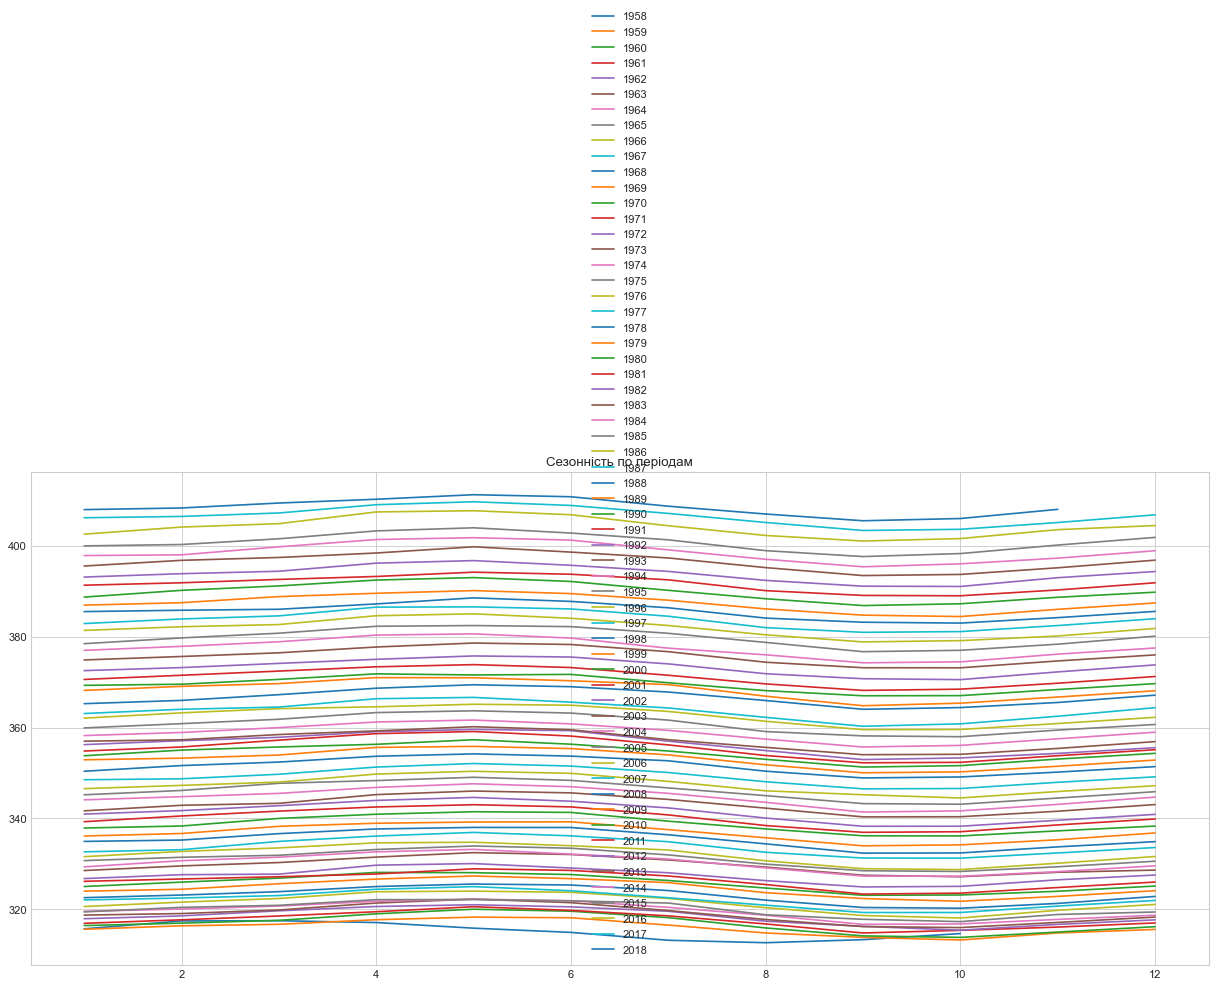

In [18]:
sesonal(df,12)

Text(0.5, 0.98, 'Мультиплікативна модель')

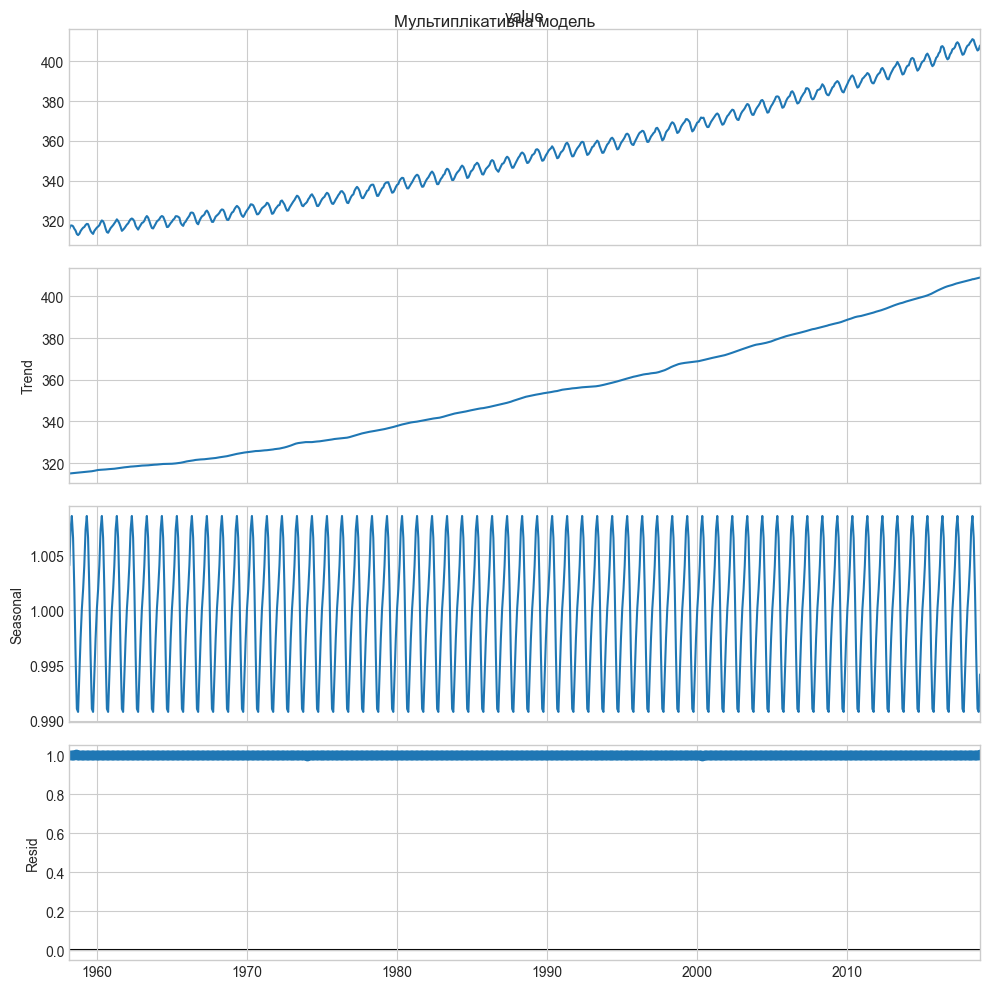

In [19]:
# декомпозиция 
result_M = seasonal_decompose(df.value, model='multiplicative', extrapolate_trend=12)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультиплікативна модель')

Text(0.5, 0.98, 'Адитивна модель')

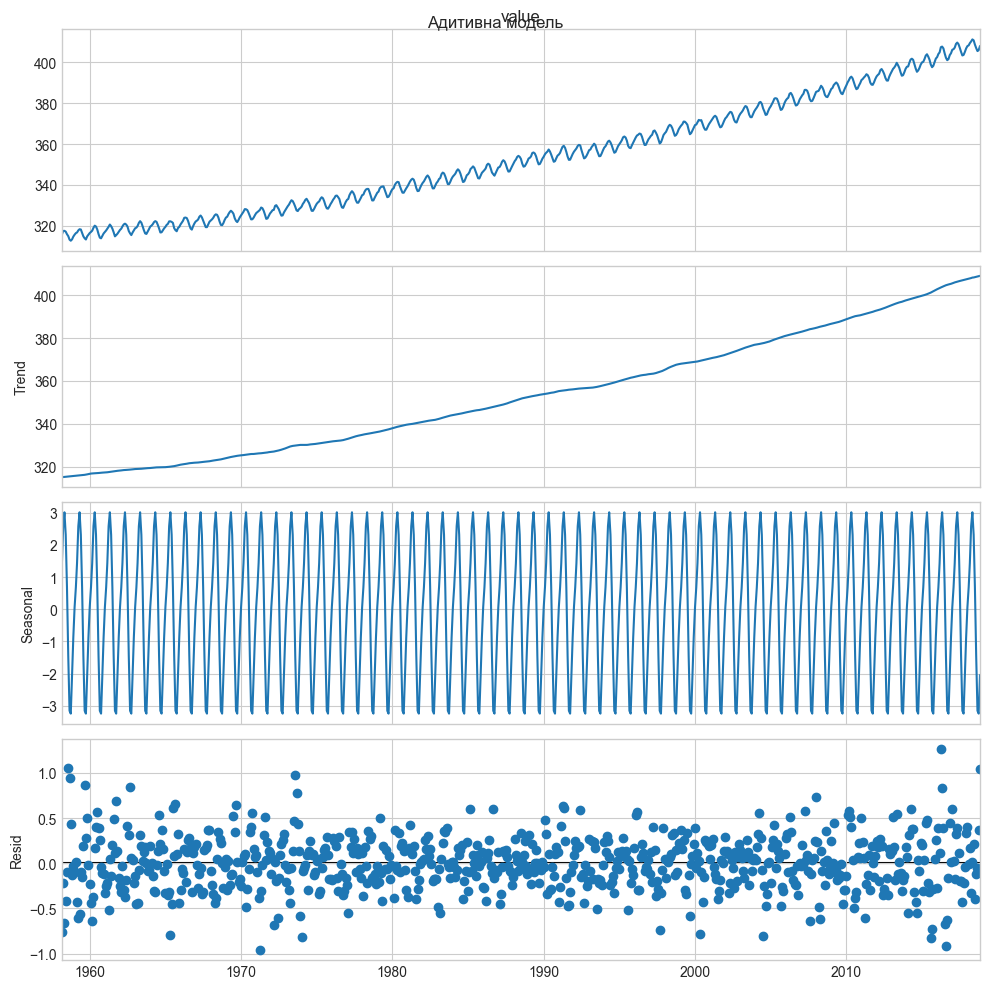

In [20]:
result_A = seasonal_decompose(df.value, model='additive', extrapolate_trend=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивна модель')

In [81]:
train=df['1958-03-01':'2017-12-01']
train.head()

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [82]:
test=df['2018-01-01':'2018-11-01']
test.head()

,value
date,
2018-01-01,407.96
2018-02-01,408.32
2018-03-01,409.41
2018-04-01,410.24
2018-05-01,411.24


In [83]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)


C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5692      0.042     13.562      0.000       0.487       0.651
ma.L1          0.3590      0.047      7.613      0.000       0.267       0.451
sigma2         0.6715      0.041     16.488      0.000       0.592       0.751


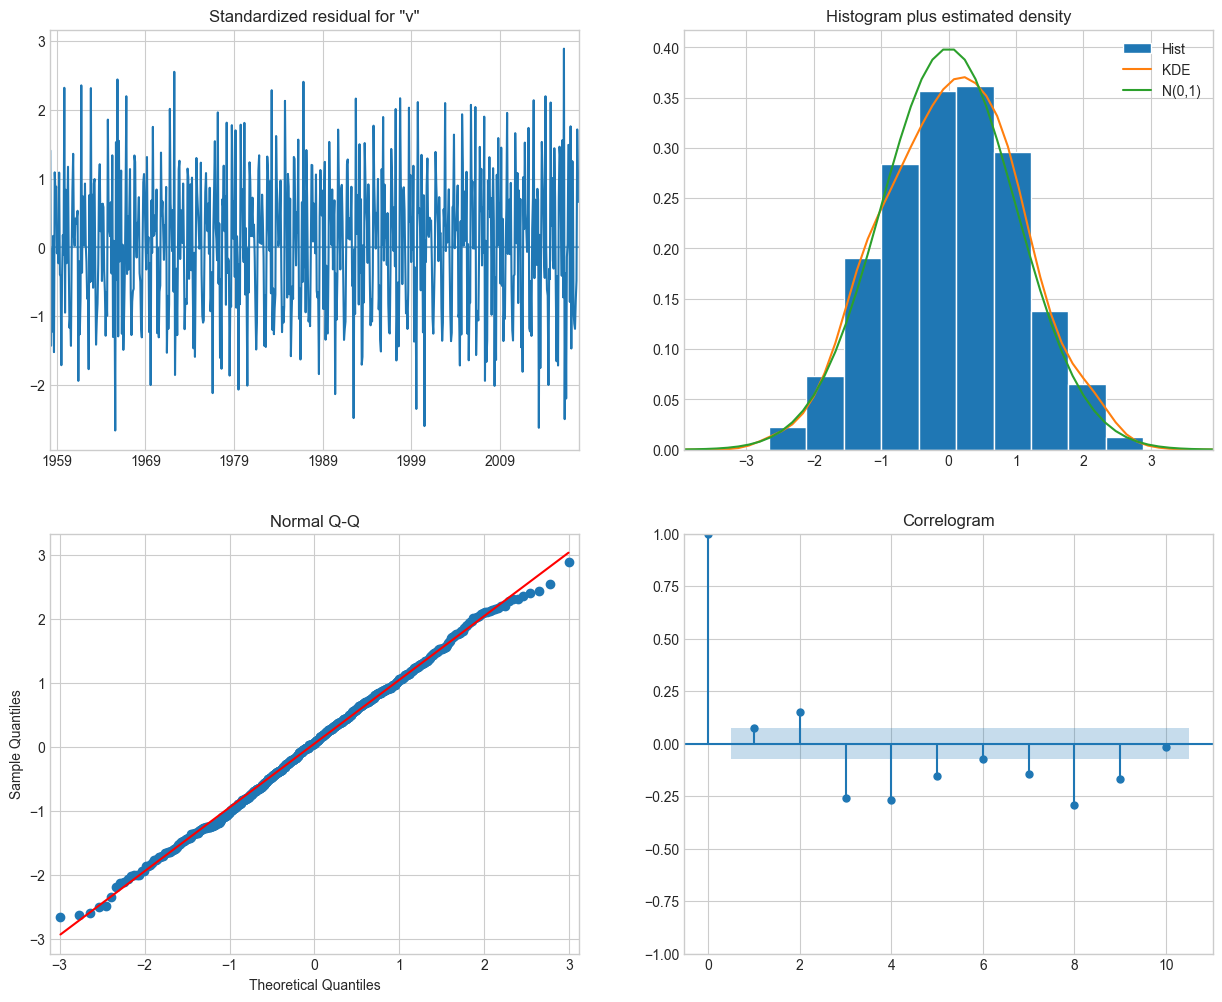

In [85]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [90]:
predict=model_fit.get_prediction()
predict.predicted_mean[:10]

1958-03-01      0.000000
1958-04-01    315.710351
1958-05-01    318.715036
1958-06-01    317.121636
1958-07-01    316.864606
1958-08-01    314.793887
1958-09-01    314.449471
1958-10-01    311.766662
1958-11-01    312.673329
1958-12-01    313.947138
Freq: MS, Name: predicted_mean, dtype: float64

In [91]:
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стаціонарність:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значення = {:.3f}".format(dftest[1]))
    print("Критичне значення :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Дані {} стационарні з ймовірністю {}% відсотків".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартна похибка:', round(((real-forecast)**2).mean()**0.5,4)) 

In [92]:
metrics(train, predict.predicted_mean)

Тест на стаціонарність:
	T-статистика = -5.323
	P-значення = 0.000
Критичне значення :
	1%: -3.4397263458688045 - Дані  стационарні з ймовірністю 99% відсотків
	5%: -2.8656777575510204 - Дані  стационарні з ймовірністю 95% відсотків
	10%: -2.5689734469387755 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 1.105
MSE: 139.4931
MAPE: 0.0033
MPE: 0.0015
Стандартна похибка: 11.8107


In [95]:
predict=model_fit.get_prediction(start='2018', end='2019')

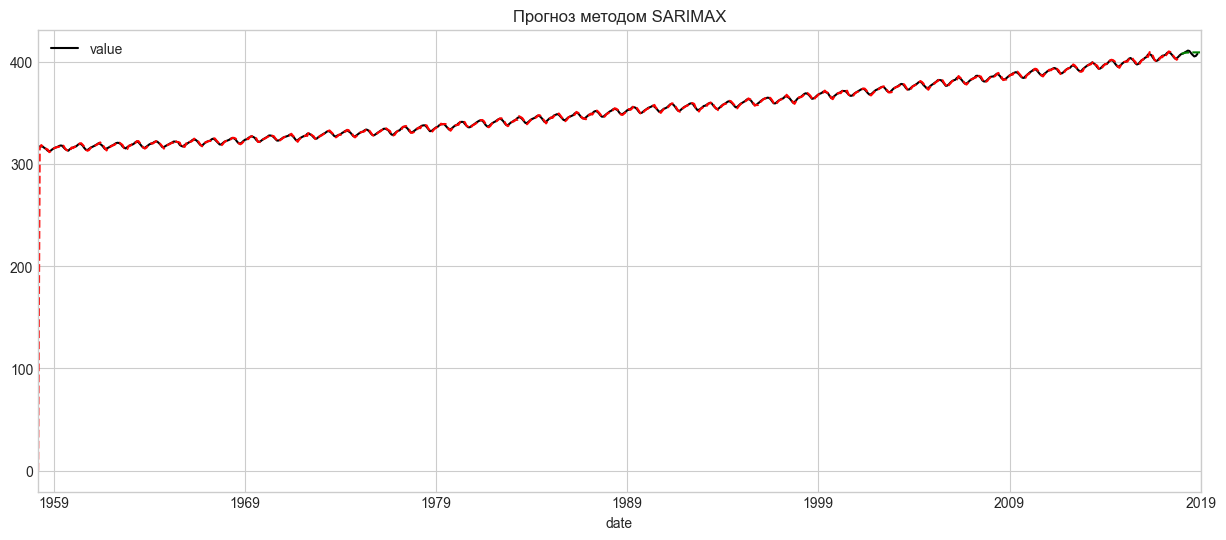

In [97]:
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом SARIMAX" )
model_fit.fittedvalues.plot(ax=ax, style='--', color='red')
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

In [101]:
predict=model_fit.get_prediction(start='2018-01-01', end='2018-11-01')
metrics(test, predict.predicted_mean)

Тест на стаціонарність:
	T-статистика = -3.838
	P-значення = 0.003
Критичне значення :
	1%: -4.473135048010974 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -3.28988060356653 - Дані  стационарні з ймовірністю 95% відсотків
	10%: -2.7723823456790124 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 1.5609
MSE: 3.9614
MAPE: 0.0038
MPE: -0.0017
Стандартна похибка: 1.9903


In [110]:
model_full = SARIMAX(df, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit_full = model_full.fit(disp=False)

C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
predict_full=model_fit_full.get_prediction(start='2018-12-01', end='2048-11-01')
predict_full.predicted_mean[:30]


2018-12-01    409.599669
2019-01-01    410.496506
2019-02-01    411.005675
2019-03-01    411.294749
2019-04-01    411.458867
2019-05-01    411.552043
2019-06-01    411.604943
2019-07-01    411.634976
2019-08-01    411.652027
2019-09-01    411.661707
2019-10-01    411.667203
2019-11-01    411.670323
2019-12-01    411.672095
2020-01-01    411.673101
2020-02-01    411.673672
2020-03-01    411.673996
2020-04-01    411.674180
2020-05-01    411.674284
2020-06-01    411.674344
2020-07-01    411.674377
2020-08-01    411.674396
2020-09-01    411.674407
2020-10-01    411.674413
2020-11-01    411.674417
2020-12-01    411.674419
2021-01-01    411.674420
2021-02-01    411.674421
2021-03-01    411.674421
2021-04-01    411.674421
2021-05-01    411.674421
Freq: MS, Name: predicted_mean, dtype: float64

In [117]:
res_forecast=predict_full.predicted_mean

In [118]:
period_for_predict_in_month = 30*12
model_fit_full.forecast(period_for_predict_in_month)

2018-12-01    409.599669
2019-01-01    410.496506
2019-02-01    411.005675
2019-03-01    411.294749
2019-04-01    411.458867
                 ...    
2048-07-01    411.674422
2048-08-01    411.674422
2048-09-01    411.674422
2048-10-01    411.674422
2048-11-01    411.674422
Freq: MS, Name: predicted_mean, Length: 360, dtype: float64

In [121]:
res_forecast.to_excel('Result_forecast.xlsx')